## Combinando processamento de imagens e redes neurais: de convoluçao à CNN


André Barbosa

Data Scientist @ Elo7

Meetup Machine Learning BH

![convolucao1](img/convolucao-1.png)

Quando trabalhamos com processamento de imagens, existem diferentes algoritmos que podemos utilizar dependendo do objetivo que queremos atingir: tirar o ruído de uma imagem, detectar suas bordas, entre outras coisas.

![convolucao2](img/convolucao-2.png)

Dentro da área de processamento de imagem, uma das técnicas mais difundidas para solucionar esses problemas é a Convolução.

A convolução tem raizes na matemática, e pode ser contínua (que é usada em processamento de sinais, por exemplo) ou discreta (que é usada em processamento de imagens).

Antes de tudo, uma coisa que podemos perceber é que, quando o computador "enxerga" uma imagem, ele não vê nada além de números

Mas como calculamos os valores dos pixels das bordas da imagem? Existem basicamente duas opções:

 - Criar pixels "artificiais" ao redor da imagem
Esses pixels extras podem ser escolhidos arbitrariamente ou podem ser estimados a partir dos pixels existentes nas suas vizinhanças (como média, valor máximo, valor mínimo etc.). Perceba que a janela sempre ocorre de uma forma "centralizada"

![convolucao4](img/convolucao-4.png)

A Convolução, então, envolve a aplicação de um kernel sobre uma imagem, gerando uma nova imagem como resultado. O kernel também é uma matriz e, na prática, ele "desliza" sobre toda a imagem, modificando-a. Para um dado deslocamento, os elementos do kernel são multiplicados pelos pixels da imagem, que, por fim, são somados e resultam em um elemento da imagem convolucionada

- Ignorar as bordas

![convolucao3](img/convolucao-3.png)

# Exemplos

- Alguns exemplos

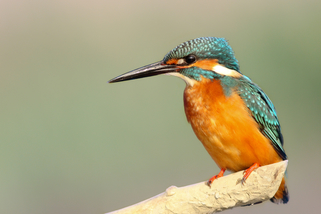

In [1]:
%matplotlib inline

from matplotlib.pyplot import imshow
from PIL import Image, ImageFilter
im = Image.open("img/bird.png")
im

- Borrar uma imagem

Kernel:

![borrar](img/borrar-imagem.png)

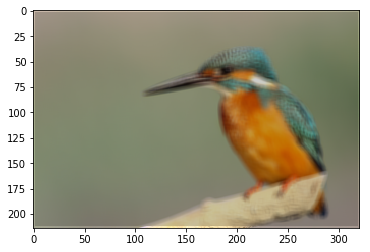

In [2]:
kernel = ImageFilter.Kernel((5, 5), [1, 1, 1, 1, 1,
                                     1, 0, 0, 0, 1,
                                     1, 0, 0, 0, 1,
                                     1, 0, 0, 0, 1,
                                     1, 1, 1, 1, 1], 20)
imshow(im.filter(kernel))

- Detectar Bordas de Objeto

Kernel:

![bordas](img/bordas-objeto.png)

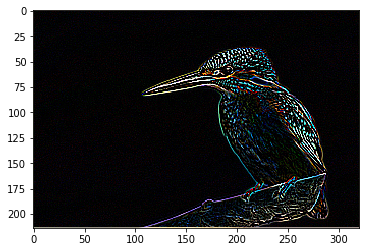

In [3]:
kernel = ImageFilter.Kernel((3, 3), [-1, -1, -1,
                                     -1, 8, -1,
                                     -1, -1, -1], scale=1)
imshow(im.filter(kernel))

Por enquanto, só utilizamos kernels estáticos e pré-definidos no momento da aplicação da convolução. Será que existe um kernel que funciona melhor para identificar texto em documentos escaneados? Ou para diferenciar gatos de cachorros em uma fotografia? Seria interessante se pudéssemos definir um método que "aprendesse" o melhor kernel (ou melhores kernels) para uma determinada tarefa! A parte boa é que isso é possível: Redes Neurais Convolucionais!

## De Convolução à Redes Neurais: as "famosas" CNN



![cnn-overall](img/cnn-overall.png)

Vamos imaginar que nós queremos identificar os rostos de uma pessoa em uma rede social, diferenciar carros e pessoas em um carro autônomo ou digitos escritos a mão por pessoas. Como faríamos isso? Ora, se tivermos um conjunto de treinamento classificado com esses objetos podemos tratar isso como um aprendizado surpervisionado, certo? 

Pegando o Exemplo de Aprendizado Surpervisionado, um dataset muito famoso que tem a ver com esse problema é o MNIST dataset.



## Revisitando o MNIST Dataset

![mnist1.png](img/mnist1.png)

O dataset MNIST contém ambos os dados de treinamento e teste, já devidamente separados. Ele contém 55,000 dados de treinamento e 10,000 dados de teste..

Cada elemento do MNIST tem:
1. Uma imagem de um digito escrito à mão 
2. No caso dos dados de treinamento, a label correspondente (um número de  0-9 que identifica a imagem)

Uma forma de resolver esse problema, então, é utilizando técnicas de aprendizado surpervisionado e uma das mais famosas são as redes neurais !

## O que são Redes Neurais Mesmo?
![redes-1](img/rede-neural-1.png)

Uma rede neural é um sistema de "neuronios" artificiais interconectados que trocam mensagens entre si. Essas conexões são ponderadas por pesos que são atualizados a medida que o treinamento ocorre de forma que a rede devidamente treinada seja capaz de responder corretamente quando apresentada à uma imagem para reconhecer.

 A ideia da ponderação por pesos é que eles sejam responsáveis por "aprender" partes daquilo que eles devem classificar e para isso, usa-se uma função de ativação (que ativa os neurônios ou não) e que é atualizada por alguma função de otimização ao final do processo, geralmente o gradiente descendente.

![redes-2](img/rede-neural-2.png)

## Mas o que Convolução tem a ver com isso?

Ora, se podemos usar pesos combinados com funções de ativação para aprender partes do nosso objetivo, porquê não utilizar essa mesma lógica para aprender as janelas de convolução? É aí que Redes Neurais Convolucionais entram ! As CNNs nada mais são do um tipo especial de Rede Neural, cuja arquitetura costuma adicionar algumas camadas a mais além da tradicional:


    - Convolucao: Que faz a mesma coisa que aprendemos anteriormente. A diferença aqui é que os parâmetros da janela serão aprendidos conforme ocorrer o ajuste de pesos. Como nas redes tradicionais, aqui também aplicamos funções de ativação na saida das redes, para definir se os dados serão usados (ou "ativados").
    
    - Subsampling: Que "Resume" a imagem, reduzindo a resolução desses features maps, fazendo com que eles sejam melhores contra qualquer tipo de distorção e diminuir o tempo de processamento de imagem. Esse resumo pode ser feito pegando o máximo do vetor ou a média entre eles. 
    
    - Fully Connected Layers: Que recebem como entrada esses `features maps` e dão como output a imagem escolhida. São as redes neurais tradicionais. 
    
    - Dropout Layer (opcional): Camada usada como regularização. Ela define uma probabilidade a qual um dado elemento pode ser descartado durante o treinamento.

## Arquitetura da Rede

![arquitetura-cnn](img/arquitetura-cnn1.png)

In [4]:
import numpy as np
import tensorflow as tf
import tflearn
import tflearn.datasets.mnist as mnist

# Retrieve the training and test data
trainX, trainY, testX, testY = mnist.load_data(one_hot=True)

hdf5 is not supported on this machine (please install/reinstall h5py for optimal experience)
Scipy not supported!
Extracting mnist/train-images-idx3-ubyte.gz
Extracting mnist/train-labels-idx1-ubyte.gz
Extracting mnist/t10k-images-idx3-ubyte.gz
Extracting mnist/t10k-labels-idx1-ubyte.gz


## Visualizando os dados de treino

Ao passar o indice de um dado de treinamento como exemplo, a função `display_digit` mostra a imagem de treinamento acompanhada de seu label correspondente.

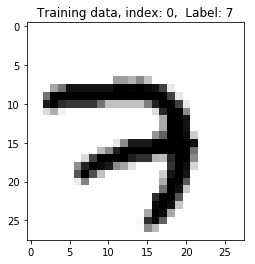

In [5]:
# Visualizing the data
import matplotlib.pyplot as plt
%matplotlib inline

# Function for displaying a training image by it's index in the MNIST set
def display_digit(index):
    label = trainY[index].argmax(axis=0)
    # Reshape 784 array into 28x28 image
    image = trainX[index].reshape([28,28])
    plt.title('Training data, index: %d,  Label: %d' % (index, label))
    plt.imshow(image, cmap='gray_r')
    plt.show()
    
# Display the first (index 0) training image
display_digit(0)

## Entendendo nossos dados:

Chamaremos nossas imagens, que serão a entrada da rede, de **X** e seus labels correspondentes, **Y**.

As labels serão codificadas como *one-hot vectors*, que são vetores que possuem 1 na categoria desejada e 0 nos demais.

A Arquitetura da nossa rede será a seguinte:

- Convolutional Layer #1: Aplica 32 filtros 5x5 (extraindo 5x5-pixel sub-regiões), com a função de ativação ReLU
- Pooling Layer #1: Aplica um max pooling com um filtro 2x2  e stride de 2 (que especifica que as regiões cujo pooling foi aplicado não se sobrepõe)
- Convolutional Layer #2: Aplica 64 filtros 5x5, com a função de ativação ReLU
- Pooling Layer #2: Novamente, aplica max pooling com filtros 2x2 e strides de 2
- Dense Layer #1: 1,024 neurôniocs, com dropout sendo aplicada como regularizador a um rate de 0.4, usando a funçnao de ativação reLU
- Dense Layer #2 (Logits Layer): 10 neurônios, um para cada digito da classe que queremos classificar(0–9). Aqui, a função de ativação a ser utilizada é a softmax

In [6]:
# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    
    # Inputs
    net = tflearn.input_data([None, trainX.shape[1]])
    
    net = tf.reshape(net, [-1, 28, 28, 1])

    # Hidden layer(s)
    net = tflearn.conv_2d(net, filter_size=[5,5],nb_filter=32,padding='same', activation=tflearn.activations.relu)
    net= tflearn.max_pool_2d(net, kernel_size=[2,2], strides=2)
    
    net = tflearn.conv_2d(net, filter_size=[5,5],nb_filter=64,padding='same', activation=tflearn.activations.relu)
    net= tflearn.max_pool_2d(net, kernel_size=[2,2], strides=2)
    
    net = tflearn.fully_connected(net, 1024, activation=tflearn.activations.relu)
    net = tflearn.dropout(net, keep_prob = 0.4)

    # Output layer and training model
    
    net = tflearn.fully_connected(net, 10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model
# Build the model
model = build_model()

In [7]:
%%time
# Training
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=5)

Training Step: 2474  | total loss: 0.17622 | time: 99.523s
| SGD | epoch: 005 | loss: 0.17622 - acc: 0.9600 -- iter: 49400/49500
Training Step: 2475  | total loss: 0.17714 | time: 102.927s
| SGD | epoch: 005 | loss: 0.17714 - acc: 0.9590 | val_loss: 0.10635 - val_acc: 0.9685 -- iter: 49500/49500
--
CPU times: user 42min 24s, sys: 5min 47s, total: 48min 12s
Wall time: 8min 38s


In [8]:
# Compare the labels that our model predicts with the actual labels

# Find the indices of the most confident prediction for each item. That tells us the predicted digit for that sample.
predictions = np.array(model.predict(testX)).argmax(axis=1)

# Calculate the accuracy, which is the percentage of times the predicated labels matched the actual labels
actual = testY.argmax(axis=1)
test_accuracy = np.mean(predictions == actual, axis=0)

# Print out the result
print("Test accuracy: ", test_accuracy)

Test accuracy:  0.9722


## Comparando com uma rede neural tradicional

Arquitetura:

Os arquivos de entradas são agrupados de uma matriz 28x28 para um único vetor 784. Além disso:

- Dense Layer #1: 128 neurônios usando a funçnao de ativação reLU
- Dense Layer #2: 32 neurônios usando a funçnao de ativação reLU
- Dense Layer #3 (Logits Layer): 10 neurônios, um para cada digito da classe que queremos classificar(0–9). Aqui, a função de ativação a ser utilizada é a softmax

In [9]:
# Define the neural network
def build_model():
    # This resets all parameters and variables, leave this here
    tf.reset_default_graph()
    
    # Inputs
    net = tflearn.input_data([None, trainX.shape[1]])

    # Hidden layer(s)
    net = tflearn.fully_connected(net, 128, activation='ReLU')
    net = tflearn.fully_connected(net, 32, activation='ReLU')
    
    # Output layer and training model
    net = tflearn.fully_connected(net, 10, activation='softmax')
    net = tflearn.regression(net, optimizer='sgd', learning_rate=0.01, loss='categorical_crossentropy')
    
    model = tflearn.DNN(net)
    return model
# Build the model
model = build_model()

Mesmos hiperparâmetros usados anteriormente

In [10]:
%%time 
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=5)

Training Step: 2474  | total loss: 1.85474 | time: 2.349s
| SGD | epoch: 005 | loss: 1.85474 - acc: 0.4053 -- iter: 49400/49500
Training Step: 2475  | total loss: 1.85762 | time: 3.373s
| SGD | epoch: 005 | loss: 1.85762 - acc: 0.3988 | val_loss: 1.83903 - val_acc: 0.4087 -- iter: 49500/49500
--
CPU times: user 29.9 s, sys: 5.77 s, total: 35.7 s
Wall time: 21.3 s


Tunning de hiperparâmetro para a rede convergir

In [12]:
model = build_model()

In [13]:
%%time
model.fit(trainX, trainY, validation_set=0.1, show_metric=True, batch_size=100, n_epoch=100)

Training Step: 49499  | total loss: 0.05006 | time: 2.375s
| SGD | epoch: 100 | loss: 0.05006 - acc: 0.9887 -- iter: 49400/49500
Training Step: 49500  | total loss: 0.04898 | time: 3.392s
| SGD | epoch: 100 | loss: 0.04898 - acc: 0.9888 | val_loss: 0.10527 - val_acc: 0.9691 -- iter: 49500/49500
--
CPU times: user 9min 52s, sys: 1min 54s, total: 11min 47s
Wall time: 6min 56s
